In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn import metrics
import math
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [2]:
df.shape

(852122, 8)

In [3]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [5]:
df.loc[df.duplicated()]

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [6]:
df=df.drop_duplicates()
df.shape

(852092, 8)

In [7]:
df.loc[df.duplicated()]

,Price,Year,Mileage,City,State,Vin,Make,Model


C:\Users\20nis\AppData\Local\Temp\ipykernel_16124\1195718110.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

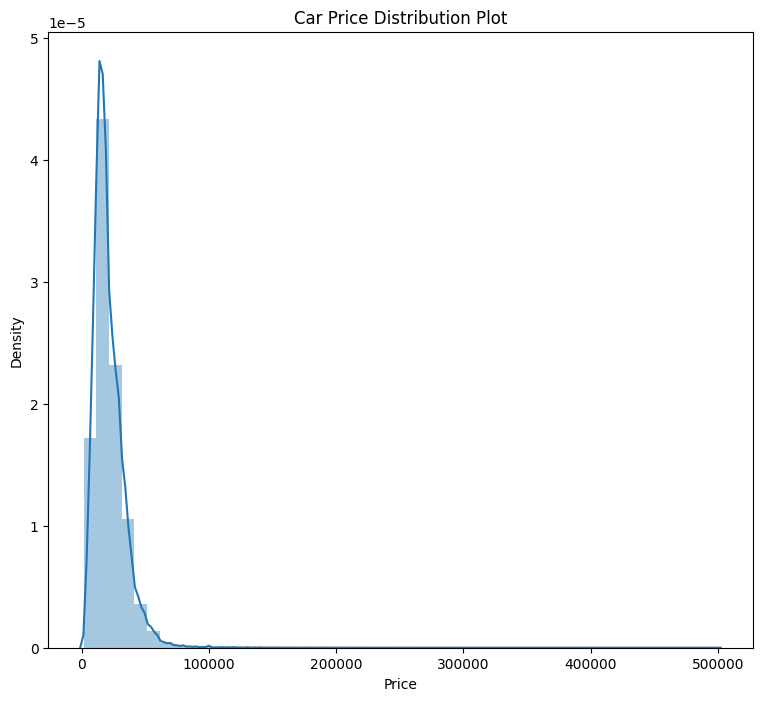

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

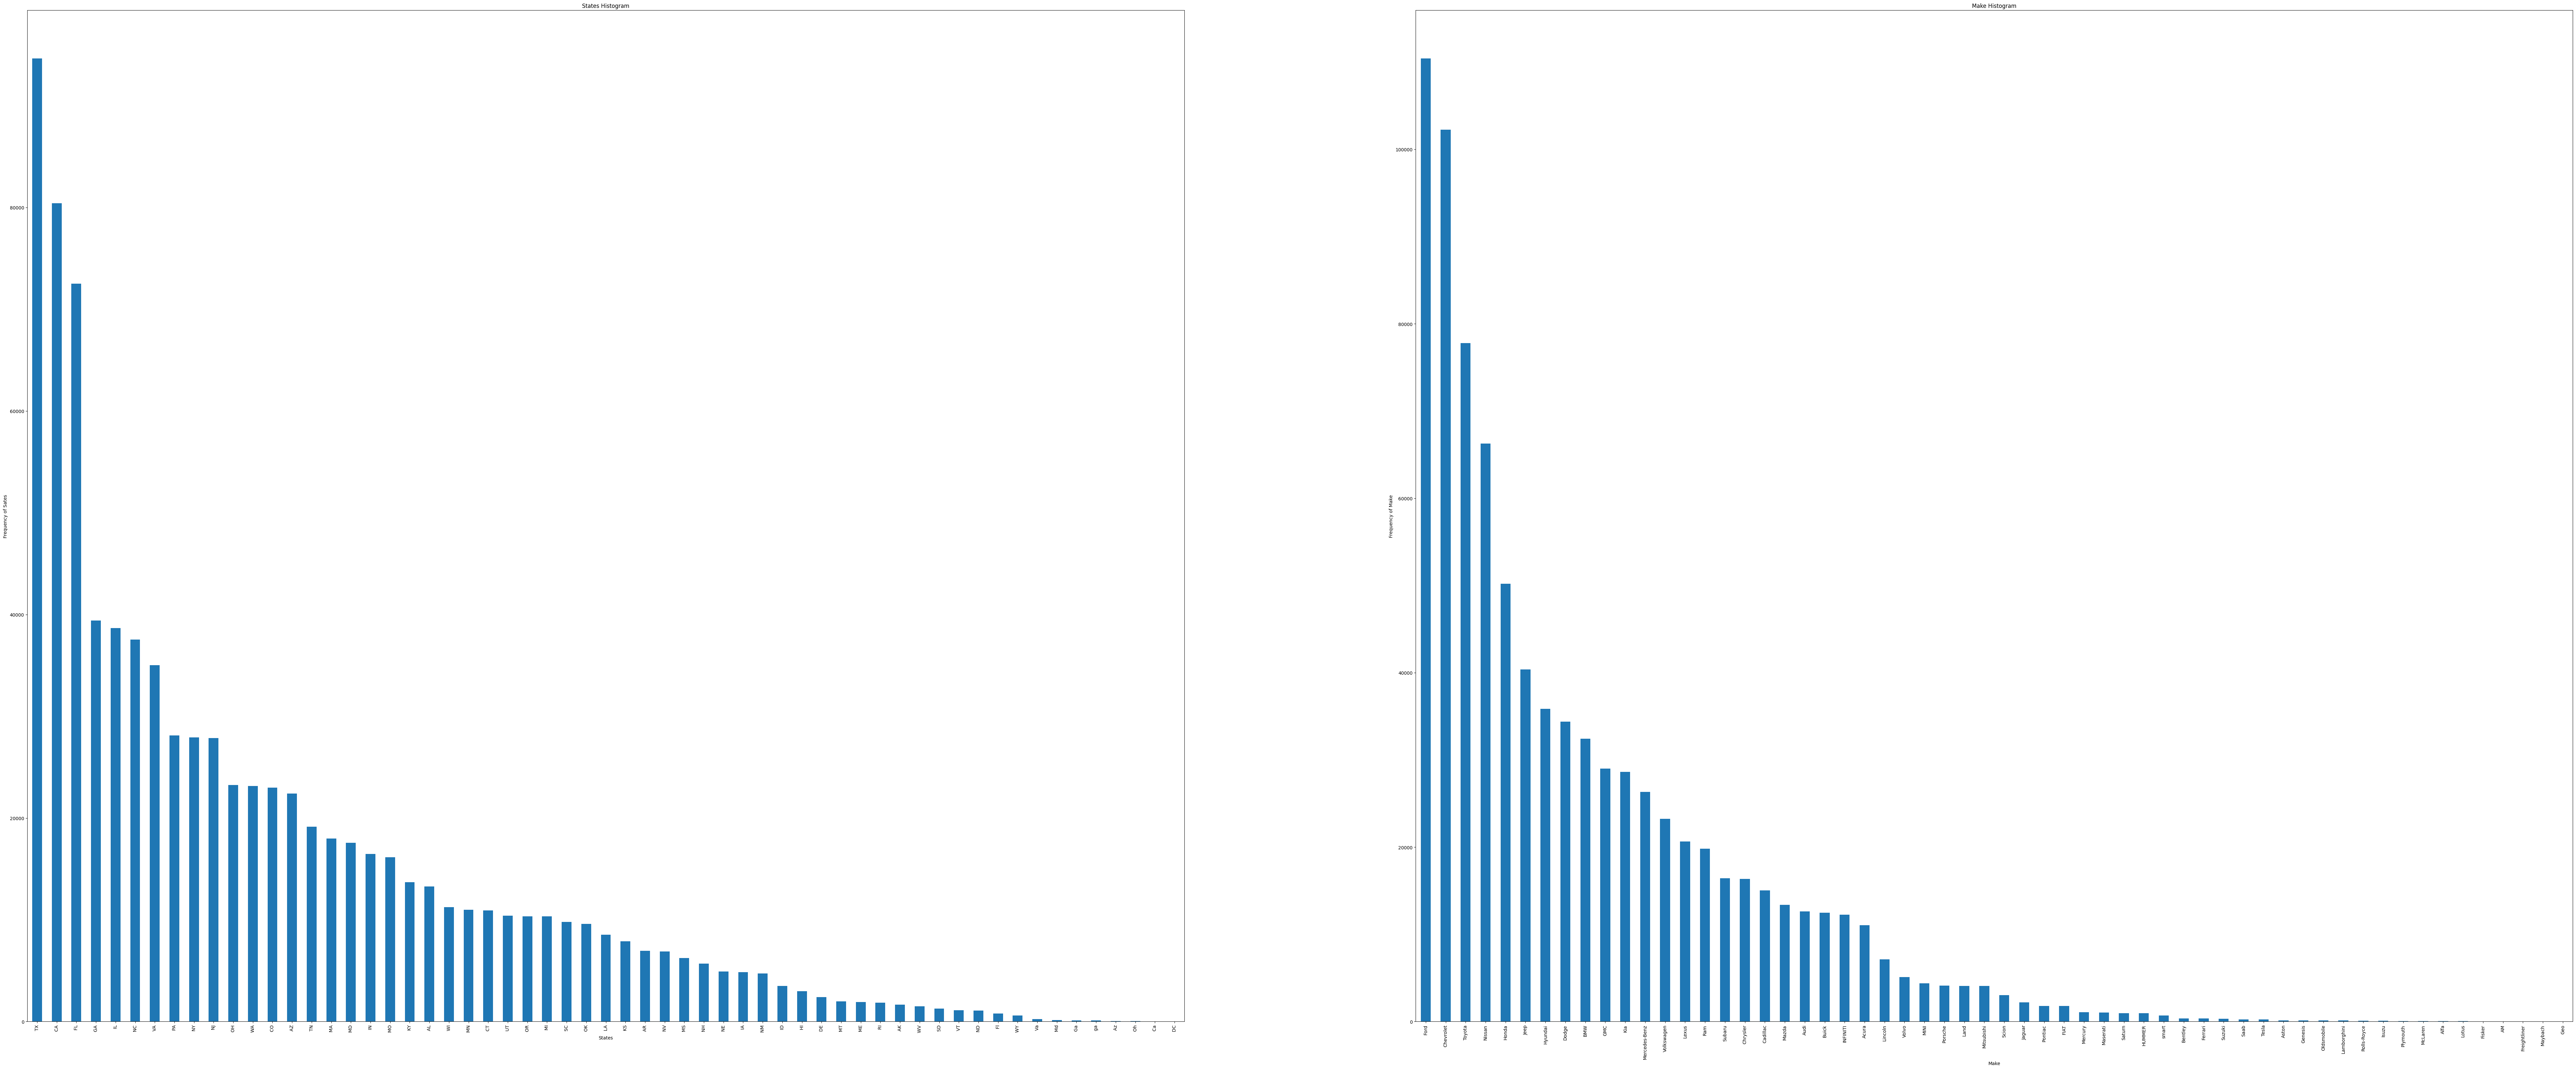

In [9]:
plt.figure(figsize=(100, 40))


plt.subplot(1,2,1)
plt1 = df.State.value_counts().plot(kind = 'bar')
plt.title('States Histogram')
plt1.set(xlabel = 'States', ylabel='Frequency of Sates')

plt.subplot(1,2,2)
plt1 = df.Make.value_counts().plot(kind = 'bar')
plt.title('Make Histogram')
plt1.set(xlabel = 'Make', ylabel='Frequency of Make')


plt.show()

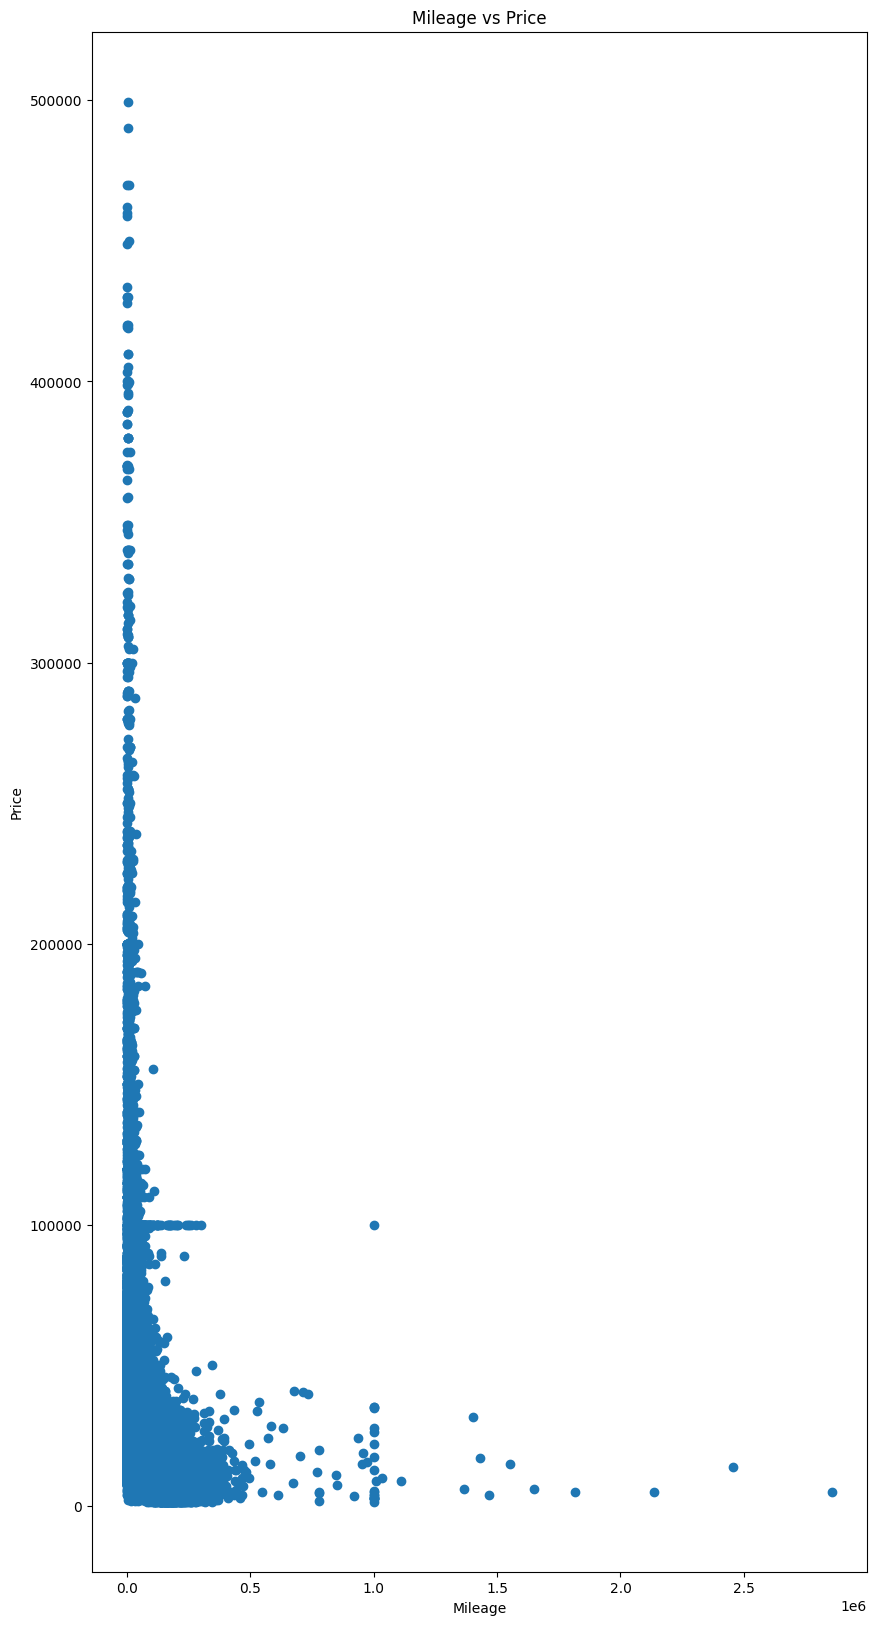

In [10]:
plt.figure(figsize=(10,20))
plt.scatter(df['Mileage'],df['Price'])
plt.title('Mileage vs Price')
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

C:\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


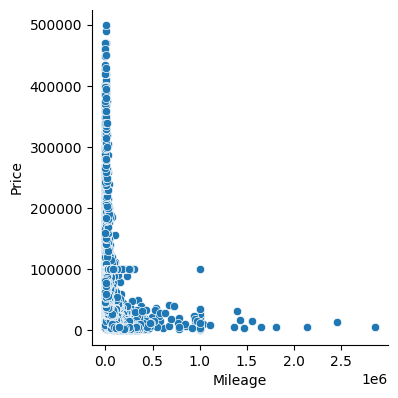

In [11]:
sns.pairplot(df, x_vars='Mileage', y_vars='Price',size=4, aspect=1, kind='scatter')
plt.show()

In [12]:
df = df.drop('Vin',1)
df.head()

C:\Users\20nis\AppData\Local\Temp\ipykernel_16124\1009288671.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Vin',1)


,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic


In [13]:
df['City'] = LabelEncoder().fit_transform(df['City'])
df['State'] = LabelEncoder().fit_transform(df['State'])
df['Make'] = LabelEncoder().fit_transform(df['Make'])
df['Model'] = LabelEncoder().fit_transform(df['Model'])
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,1,1194
1,10888,2013,19606,1260,39,1,1193
2,8995,2013,48851,646,49,1,1194
3,10999,2014,39922,2490,6,1,1193
4,14799,2016,22142,1231,50,1,1196


In [14]:
X = df.iloc[:,1:7].values
y = df.iloc[:,0].values

print("X Shape : ",X.shape)
print("y Shape : ",y.shape)

X Shape :  (852092, 6)
y Shape :  (852092,)


In [15]:
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train Shape : ",X_train.shape)
print("y_train Shape : ",y_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_test Shape : ",y_test.shape)

X_train Shape :  (681673, 6)
y_train Shape :  (681673,)
X_test Shape :  (170419, 6)
y_test Shape :  (170419,)


Multiple Linear Regression
MSE:  142465328.23018906
RMSE:  11935.884057336894
R2 Score:  0.21052081424433766



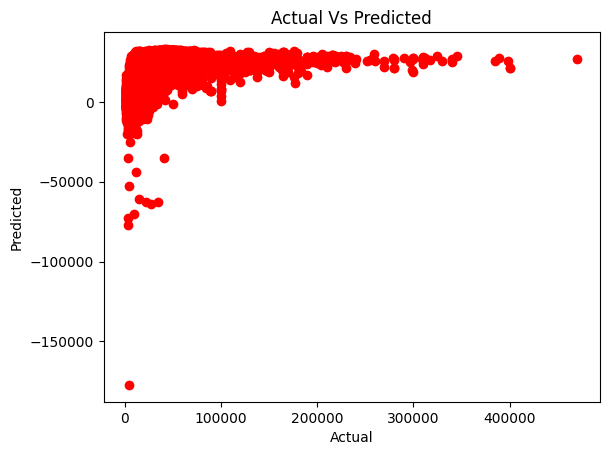

In [16]:
#Multiple Linear Regression

mlr = LinearRegression().fit(X_train,y_train)
yhat4 = mlr.predict(X_test)
MSE4 = metrics.mean_squared_error(y_test,yhat4)
RMSE4 = math.sqrt(MSE4)
MAE4 = metrics.mean_absolute_error(y_test,yhat4)
r24 = metrics.r2_score(y_test,yhat4)
print("Multiple Linear Regression")
print("MSE: ",MSE4)
print("RMSE: ",RMSE4)
print("R2 Score: ",r24)
print("")
plt.scatter(y_test, yhat4, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Random Forest Regression
MSE:  18451636.9163956
RMSE:  4295.536860090436
R2 Score:  0.8977492736683403



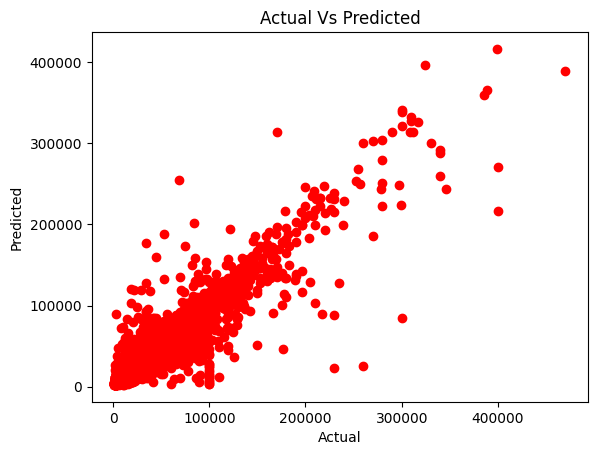

In [17]:
#Random Forest Regression

rfr = RandomForestRegressor(n_estimators = 30 , random_state = 3).fit(X_train,y_train)
yhat3 = rfr.predict(X_test)
MSE3 = metrics.mean_squared_error(y_test,yhat3)
RMSE3 = math.sqrt(MSE3)
MAE3 = metrics.mean_absolute_error(y_test,yhat3)
r23 = metrics.r2_score(y_test,yhat3)
print("Random Forest Regression")
print("MSE: ",MSE3)
print("RMSE: ",RMSE3)
print("R2 Score: ",r23)
print('')
plt.scatter(y_test, yhat3, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

XG Boost Regression
MSE:  20962549.298108906
RMSE:  4578.487664951049
R2 Score:  0.8838349192970375



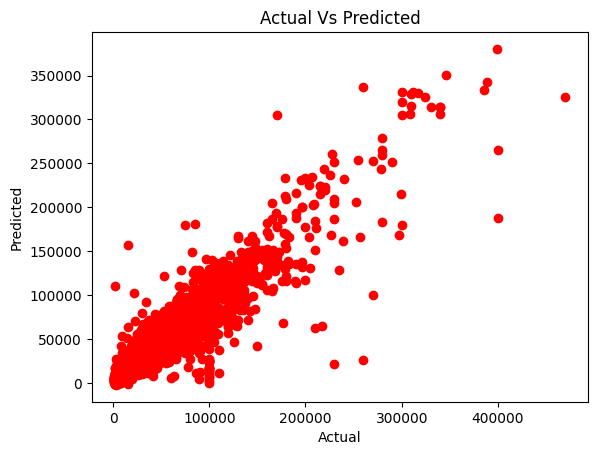

In [18]:
#XGB

xg = XGBRegressor().fit(X_train,y_train)
yhat5 = xg.predict(X_test)
MSE5 = metrics.mean_squared_error(y_test,yhat5)
RMSE5 = math.sqrt(MSE5)
MAE5 = metrics.mean_absolute_error(y_test,yhat5)
r25 = metrics.r2_score(y_test,yhat5)
print("XG Boost Regression")
print("MSE: ",MSE5)
print("RMSE: ",RMSE5)
print("R2 Score: ",r25)
print("")
plt.scatter(y_test, yhat5, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

LGBM
MSE:  35643998.41226916
RMSE:  5970.259492875428
R2 Score:  0.8024768889864436



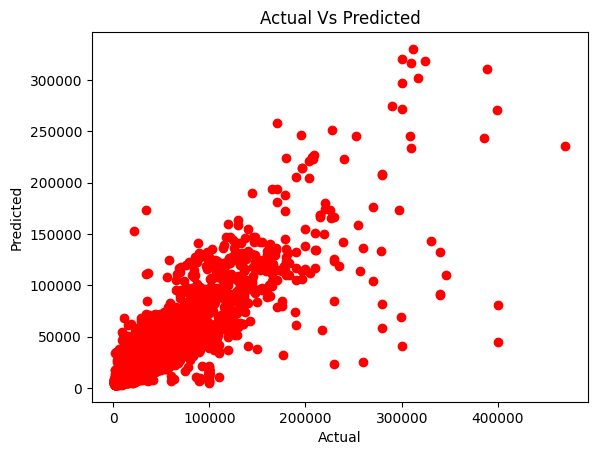

In [19]:
#LGBM
lgbm = LGBMRegressor().fit(X_train,y_train)
yhat6 = lgbm.predict(X_test)
MSE6 = metrics.mean_squared_error(y_test,yhat6)
RMSE6 = math.sqrt(MSE6)
MAE6 = metrics.mean_absolute_error(y_test,yhat6)
r26 = metrics.r2_score(y_test,yhat6)
print("LGBM")
print("MSE: ",MSE6)
print("RMSE: ",RMSE6)
print("R2 Score: ",r26)
print("")
plt.scatter(y_test, yhat6, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Learning rate set to 0.114785
0:	learn: 13253.7008355	total: 204ms	remaining: 3m 23s
1:	learn: 12898.8127364	total: 249ms	remaining: 2m 4s
2:	learn: 12595.5339196	total: 294ms	remaining: 1m 37s
3:	learn: 12367.5953770	total: 338ms	remaining: 1m 24s
4:	learn: 12128.1320055	total: 379ms	remaining: 1m 15s
5:	learn: 11949.5001943	total: 423ms	remaining: 1m 10s
6:	learn: 11774.8956479	total: 473ms	remaining: 1m 7s
7:	learn: 11639.5733034	total: 517ms	remaining: 1m 4s
8:	learn: 11503.3146355	total: 558ms	remaining: 1m 1s
9:	learn: 11357.3566931	total: 598ms	remaining: 59.2s
10:	learn: 11247.6413032	total: 640ms	remaining: 57.6s
11:	learn: 11124.3106414	total: 683ms	remaining: 56.3s
12:	learn: 11046.5258032	total: 725ms	remaining: 55s
13:	learn: 10936.0568280	total: 771ms	remaining: 54.3s
14:	learn: 10764.7179345	total: 819ms	remaining: 53.8s
15:	learn: 10696.2088333	total: 859ms	remaining: 52.8s
16:	learn: 10631.3299650	total: 904ms	remaining: 52.3s
17:	learn: 10531.3674978	total: 947ms	rema

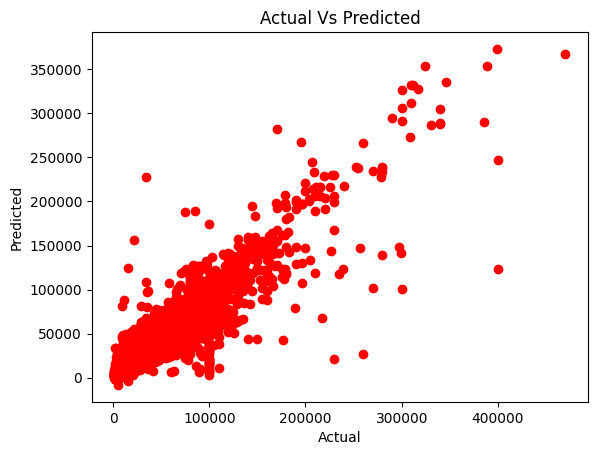

In [20]:
#CATBOOST
cb = CatBoostRegressor().fit(X_train,y_train)
yhat7 = cb.predict(X_test)
MSE7 = metrics.mean_squared_error(y_test,yhat7)
RMSE7 = math.sqrt(MSE7)
MAE7 = metrics.mean_absolute_error(y_test,yhat7)
r27 = metrics.r2_score(y_test,yhat7)
print("CATBoost")
print("MSE: ",MSE7)
print("RMSE: ",RMSE7)
print("R2 Score: ",r27)
print("")
plt.scatter(y_test, yhat7, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [22]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=45, input_dim= X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=15, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 100, epochs = 100, verbose='0')
yhat8 = model.predict(X_test)
r28 = metrics.r2_score(y_test,yhat8)
print("R2 Score: ",r28)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78